path=WindowsPath('c:/Users/Burai/OneDrive/Documents/GitHub/Brian-Gomez-Santiestevez-OPA23GB/ML_pt2_Labb2')


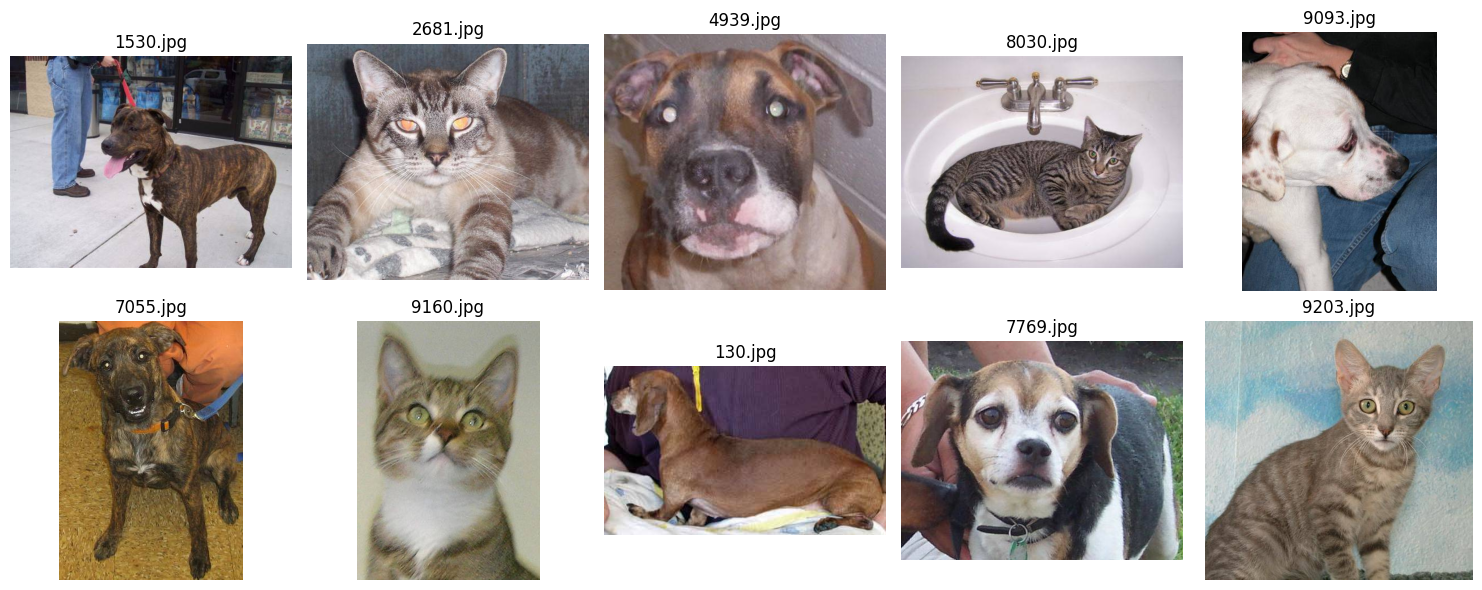

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import random

# Set the path to the directory containing the image files
path = Path().absolute()
print(f"{path=}")

# Correctly set up the absolute path as a Path object
absolute_path = Path(r"c:/Users/Burai/OneDrive/Documents/GitHub/Brian-Gomez-Santiestevez-OPA23GB/ML_pt2_Labb2/original_data/test/test")

# List all .jpg image files in the directory
image_files = list(absolute_path.glob('*.jpg'))

# Check if there are enough files to sample from
if len(image_files) < 10:
    raise ValueError("Not enough image files to sample 10 items.")

# randomly select 10 image files
random_files = random.sample(image_files, 10)

# figure to display the images in a grid
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # Adjust subplot grid as needed
axes = axes.flatten()

# Read and display each image file
for ax, file_path in zip(axes, random_files):
    # Read the image using OpenCV
    image = cv2.imread(str(file_path), cv2.IMREAD_UNCHANGED)
    # Convert BGR to RGB (OpenCV loads images in BGR)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Display the image
    ax.imshow(image_rgb)
    ax.axis('off')  # Hide axes
    ax.set_title(file_path.name)  #set the file name as title

plt.tight_layout()
plt.show()


In [6]:
from pathlib import Path

def create_directory_structure(base_dir):
    # Define the base directory as a Path object
    base_path = Path(base_dir)
    
    # List of directories to create
    directories = [
        'experiment_small_data/test',
        'experiment_small_data/train',
        'experiment_small_data/val',
        'experiment_tiny_data/test',
        'experiment_tiny_data/train',
        'experiment_tiny_data/val',
        'original_data',
        'original_data/test',
        'original_data/train'
    ]
    
    # Loop through the directories list and create each one
    for directory in directories:
        (base_path / directory).mkdir(parents=True, exist_ok=True)



# Set the base directory to the current directory where this script runs
base_dir = '.'
create_directory_structure(base_dir)

print("Directory structure created successfully!")


Directory structure created successfully!


In [ ]:
import shutil
from pathlib import Path
import random

def setup_directories(base_dir, experiments):
    # Create directories for each experiment and split
    for experiment, splits in experiments.items():
        for split in splits.keys():
            for category in ['dogs', 'cats']:
                (base_dir / experiment / split / category).mkdir(parents=True, exist_ok=True)

def distribute_files(base_dir, source_dir, experiments):
    categories = ['dogs', 'cats']
    for experiment, splits in experiments.items():
        for category in categories:
            # Path to the original category images
            category_path = source_dir / category
            # Gather all jpg images
            images = list(category_path.glob('*.jpg'))
            random.shuffle(images)
            
            start_idx = 0
            for split, count in splits.items():
                end_idx = start_idx + count
                split_images = images[start_idx:end_idx]
                for image in split_images:
                    target_path = base_dir / experiment / split / category
                    shutil.move(str(image), target_path)
                start_idx = end_idx

# Define the base directory and the source directory
base_dir = Path('/path/to/your/base_directory')
source_dir = base_dir / 'original_data'

# Define the experiments and the number of images per category for each split
experiments = {
    'experiment_small': {'train': 800, 'val': 200, 'test': 250},
    'experiment_tiny': {'train': 80, 'val': 20, 'test': 25}
}

# Setup directories
setup_directories(base_dir, experiments)

# Distribute files according to the defined splits
distribute_files(base_dir, source_dir, experiments)

print("Files have been distributed according to the defined splits.")
